# Интерпретация. Практическая работа

## Цель практической работы

Научиться интерпретировать модели кластеризации.

## Что входит в практическую работу


1. Загрузить данные и провести разведочный анализ.
2. Предположить оптимальное количество кластеров.
3. Очистить и подготовить данные для использования в моделях машинного обучения.
4. Построить модель кластеризации с помощью библиотеки Scikit-learn и вычислить оптимальное количество кластеров.
5. Визуализировать результаты кластеризации.
6. Интерпретировать полученные результаты.
7. Подкрепить выводы интерпретации визуализациями.

## Что оценивается 

* Выполнены все этапы работы.
* Сделаны выводы по результатам разведочного анализа данных.
* Выполнена и обоснована подготовка данных.
* Выбор количества кластеров обоснован и подкреплён визуализацией. 
* Выбор гиперпараметров метода понижения размерности обоснован.
* Интерпретация кластеров подкреплена расчётами и визуализацией. 



# Задача

У вас имеется некоторый набор данных `marketing_campaign.csv` о покупателях супермаркета.

* ID — уникальный идентификатор клиента.
* Year_Birth — год рождения клиента.
* Dt_Customer — дата регистрации клиента на сайте.
* Recency — количество дней с момента последней покупки клиента.
* MntFruits — сумма, потраченная на фрукты за последние два года.
* MntMeatProducts — сумма, потраченная на мясо за последние два года.
* MntFishProducts — сумма, потраченная на рыбу за последние два года.
* MntSweetProducts — сумма, потраченная на сладости за последние два года.
* NumWebPurchases — количество покупок, совершённых через сайт.
* NumStorePurchases — количество покупок, совершённых непосредственно в магазинах.
* Response: 1, если клиент участвовал в последней рекламной кампании, 0 — в противном случае.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы покупателей. Подготовьте результаты своей работы для демонстрации заказчику, не погружённому в машинное обучение.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('marketing campaign.csv')
df.head()

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0


In [105]:
df.shape

(2240, 11)

In [106]:
# пропуски в данных отсутствуют

for i in df.columns:
    print(i, sum(df[i].isna()))

ID 0
Year_Birth 0
Dt_Customer 0
Recency 0
MntFruits 0
MntMeatProducts 0
MntFishProducts 0
MntSweetProducts 0
NumWebPurchases 0
NumStorePurchases 0
Response 0


In [107]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

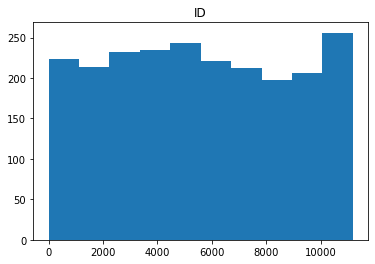

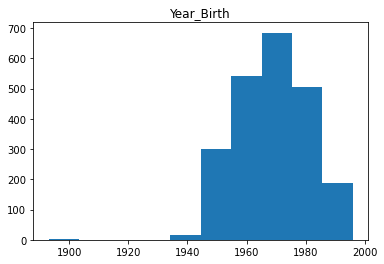

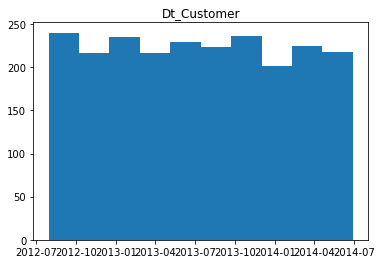

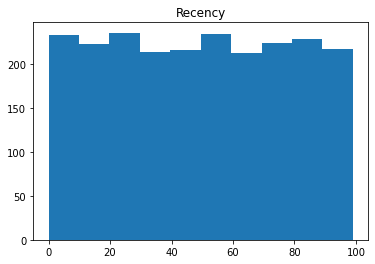

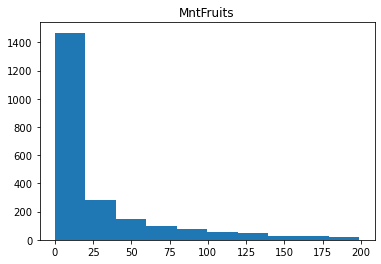

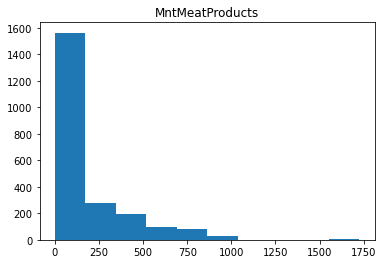

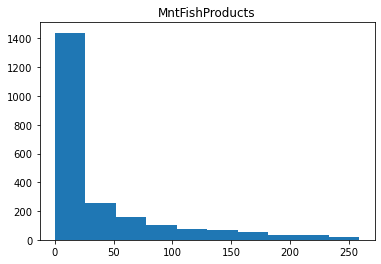

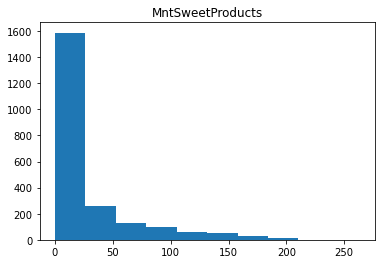

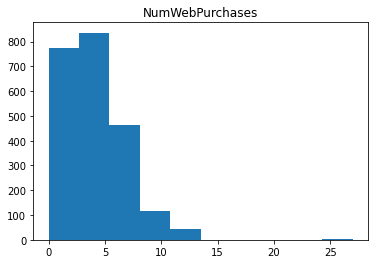

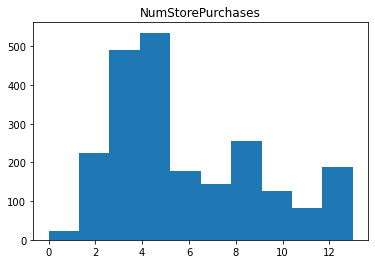

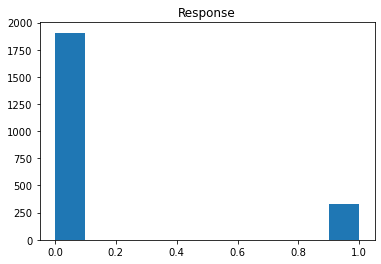

In [108]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [109]:
df['Dt_Customer'].dt.year.value_counts()

2013    1189
2014     557
2012     494
Name: Dt_Customer, dtype: int64

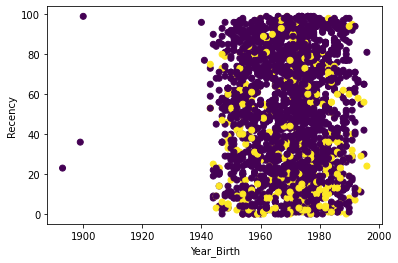

In [110]:
plt.scatter(df['Year_Birth'], df['Recency'], c=df['Response'], cmap='viridis')
plt.xlabel('Year_Birth')
plt.ylabel('Recency')
plt.show()

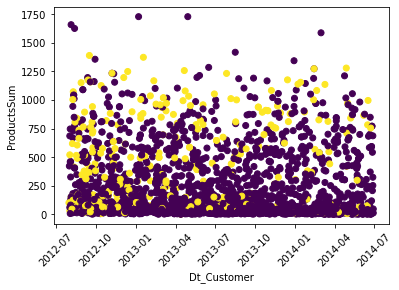

In [111]:
plt.scatter(df['Dt_Customer'],
            df['MntFruits'] + df['MntSweetProducts'] + df['MntFishProducts'] + df['MntMeatProducts'],
            c=df['Response'], cmap='viridis')
plt.xlabel('Dt_Customer')
plt.ylabel('ProductsSum')
plt.xticks(rotation=45)
plt.show()

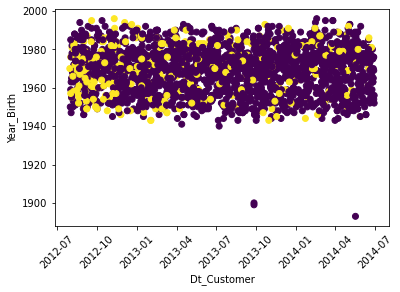

In [112]:
plt.scatter(df['Dt_Customer'],
            df['Year_Birth'],
            c=df['Response'], cmap='viridis')
plt.xlabel('Dt_Customer')
plt.ylabel('Year_Birth')
plt.xticks(rotation=45)
plt.show()

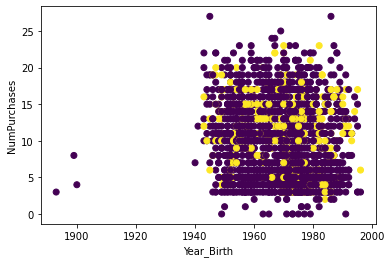

In [113]:
plt.scatter(df['Year_Birth'],
            df['NumWebPurchases'] + df['NumStorePurchases'],
            c=df['Response'], cmap='viridis')
plt.xlabel('Year_Birth')
plt.ylabel('NumPurchases')
plt.show()

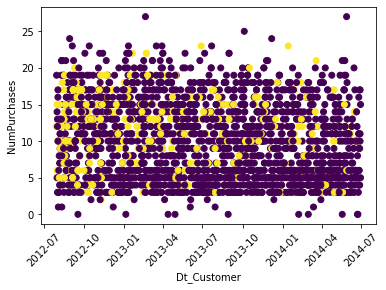

In [114]:
plt.scatter(df['Dt_Customer'],
            df['NumWebPurchases'] + df['NumStorePurchases'],
            c=df['Response'], cmap='viridis')
plt.xlabel('Dt_Customer')
plt.ylabel('NumPurchases')
plt.xticks(rotation=45)
plt.show()

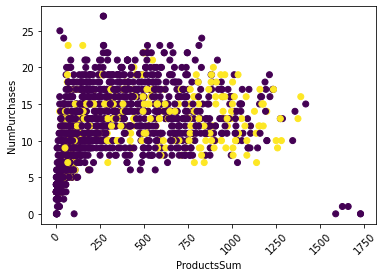

In [115]:
plt.scatter(df['MntFruits'] + df['MntSweetProducts'] + df['MntFishProducts'] + df['MntMeatProducts'],
            df['NumWebPurchases'] + df['NumStorePurchases'],
            c=df['Response'], cmap='viridis')
plt.xlabel('ProductsSum')
plt.ylabel('NumPurchases')
plt.xticks(rotation=45)
plt.show()

# Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Данных может быть так много, что построение одной модели будет занимать несколько часов, поэтому важно заранее примерно представлять количество кластеров до запуска обучения модели.

На основе проведённого разведочного анализа данных предположите, какое количество кластеров будет оптимальным, аргументируйте своё предположение.

При проведении разведочного анализа ярко выраженных кластеров не было обнаружено.
Поскольку существует две группы покупателей, участвовавших в рекламной кампании и нет, в качестве начального предположения можно указать 2 кластера.

# Задание 3

Выполните очистку и подготовку данных для дальнейшего использования при построении моделей машинного обучения. Аргументируйте выбранные шаги подготовки данных. 

In [116]:
# удалим столбец ID, поскольку он никак не описыват качества покупателя

df = df.drop(['ID'], axis=1)

In [117]:
# в признаке Year_Birth есть выбросы в виде покупателей с возрастом более 120 лет
# найдем все выбросы за пределами полуторного межквартильного расстояния

def find_boundaries(series):
    q25 = series.quantile(0.25)
    q75 = series.quantile(0.75)
    iqr = q75 - q25
    
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries


bounds = find_boundaries(df['Year_Birth'])
bounds

(1932.0, 2004.0)

In [118]:
len(df[(df['Year_Birth'] < bounds[0]) | (df['Year_Birth'] > bounds[1])]) / len(df)

0.0013392857142857143

In [119]:
# выбросы занимают незначительную часть выборки, удалим их

df = df[(df['Year_Birth'] >= bounds[0]) & (df['Year_Birth'] <= bounds[1])]

In [120]:
# вместо столбца Dt_Customer добавим два столбца с годом и месяцем

df['year'] = df['Dt_Customer'].dt.year
df['month'] = df['Dt_Customer'].dt.month
df = df.drop(['Dt_Customer'], axis=1)
df.head()

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,year,month
0,1957,58,88,546,172,88,8,4,1,2012,9
1,1954,38,1,6,2,1,1,2,0,2014,3
2,1965,26,49,127,111,21,8,10,0,2013,8
3,1984,26,4,20,10,3,2,4,0,2014,2
4,1981,94,43,118,46,27,5,6,0,2014,1


# Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя и метрики silhouette score. 

Помните, что аналитический способ определения количества кластеров не является единственно верным. Если ваше понимание предметной области и результаты анализа данных расходятся с результатами метода локтя, вы можете выбрать и обосновать количество кластеров, исходя из своего опыта.

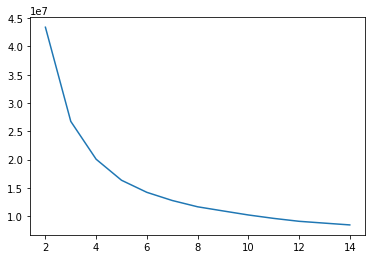

In [121]:
# из метода локтя оптимальное количество кластеров - 4

from sklearn.cluster import KMeans

n_clusters = list(range(2, 15))

metrics = []

for k in n_clusters:
    km = KMeans(n_clusters=k).fit(df)
    metrics.append(km.inertia_)

plt.plot(n_clusters, metrics)

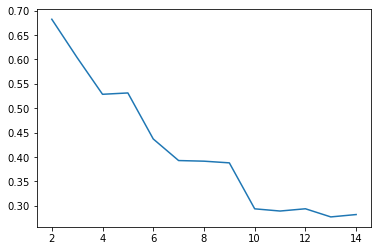

In [122]:
# из метрики silhouette_score оптимальное количество кластеров - 2

from sklearn.metrics import silhouette_score

n_clusters = list(range(2, 15))

metrics = []

for k in n_clusters:
    km = KMeans(n_clusters=k).fit(df)
    metrics.append(silhouette_score(df, km.labels_))

plt.plot(n_clusters, metrics)

In [123]:
km = KMeans(n_clusters=2).fit(df)
labels = km.labels_

# Задание 5

Визуализируйте результаты кластеризации на двумерном графике с помощью метода t-SNE. Обоснуйте выбранные значения его гиперпараметров.

In [124]:
# размерность датасета будем понижать до 2: n_components=2

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20)
df_emb = tsne.fit_transform(df)
data = pd.DataFrame(df_emb)

C:\Users\55317\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\55317\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


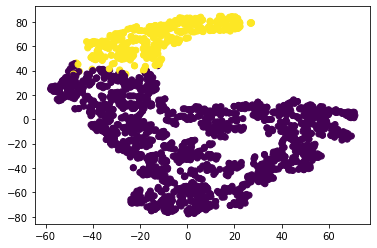

In [125]:
plt.scatter(data[0], data[1], c=labels, cmap='viridis')

# Задание 6

Постройте профили кластеров и опишите их.

In [126]:
pd.DataFrame(km.cluster_centers_, columns=df.columns)

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,year,month
0,1968.918753,48.741235,16.362270,71.637730,22.702838,17.126322,3.829160,5.178631,0.115748,2013.037841,6.446856
1,1968.831818,50.588636,66.736364,556.045455,98.050000,67.675000,5.140909,8.309091,0.286364,2012.986364,6.543182


В группе 1 находятся покупатели, которые за последние два года делали покупки на большие суммы, чем покупатели из группы 0.
Они раньше покупателей из группы 0 зарегистрировались на сайте и из них больше людей участвовали в рекламной кампании.

# Задание 7

Визуализируйте профили кластеров. Подготовьте краткое резюме результатов вашего исследования для заказчика.

In [127]:
df['labels'] = km.labels_
group0 = df[df['labels'] == 0]
group1 = df[df['labels'] == 1]

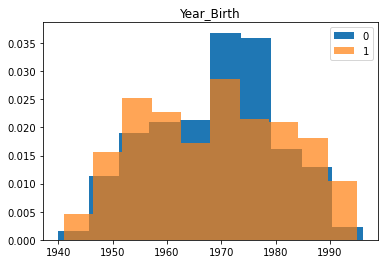

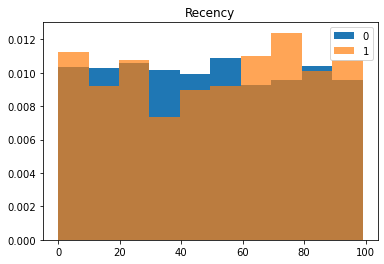

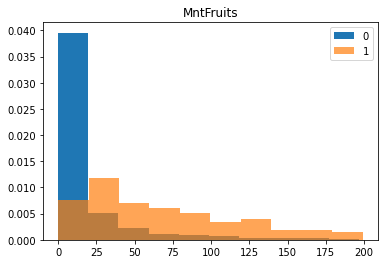

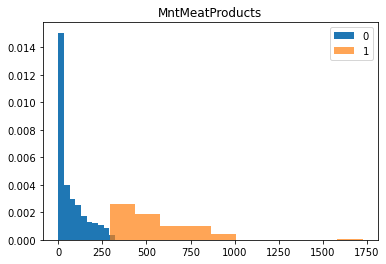

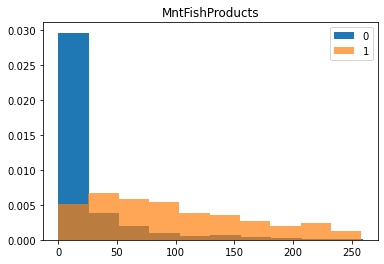

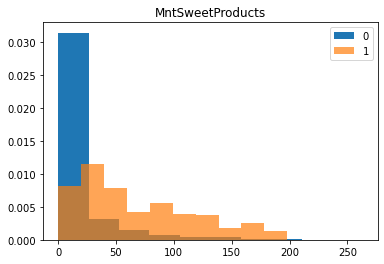

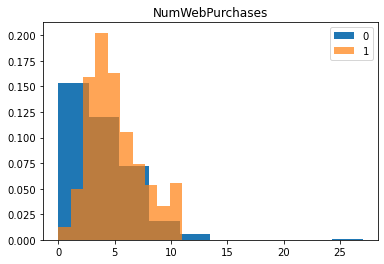

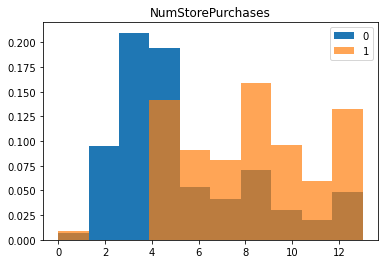

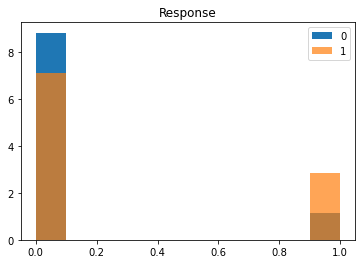

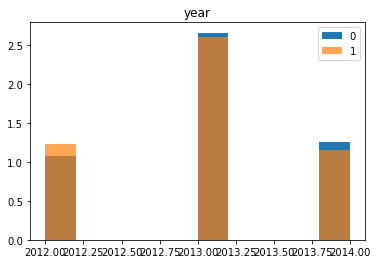

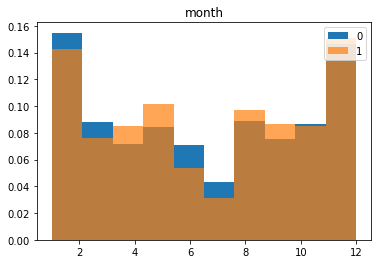

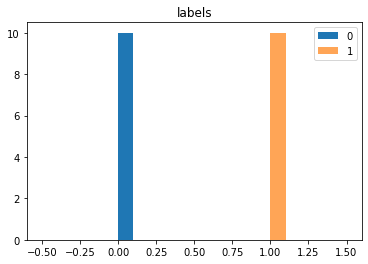

In [128]:
for i in group1.columns:   
    plt.hist(group0[i], density=True, label='0')
    plt.hist(group1[i], density=True, alpha=0.7, label='1')
    plt.legend(loc='upper right')
    plt.title(i)
    plt.show()

Покупатели группы 1 тратят больше денег на все категории товаров.
Совершают больше покупок как в магазине, так и через сайт.
Процент покупателей, участвовавших в рекламной кампании, среди покупателей 1й группы больше, чем в группе 0.

## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (.ipynb) или ссылку на него.